In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
df = pd.read_csv('data.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [66]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

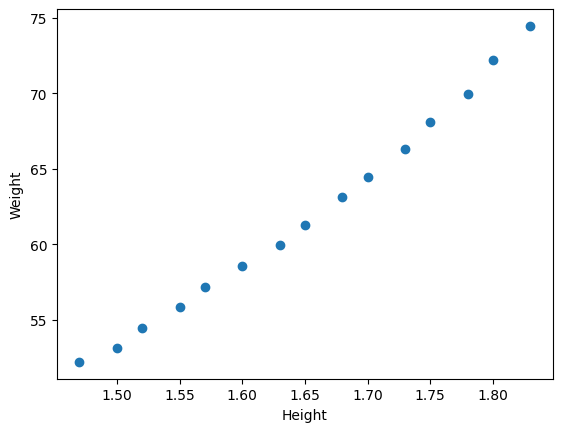

In [67]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [68]:
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


In [69]:
import seaborn as sns

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


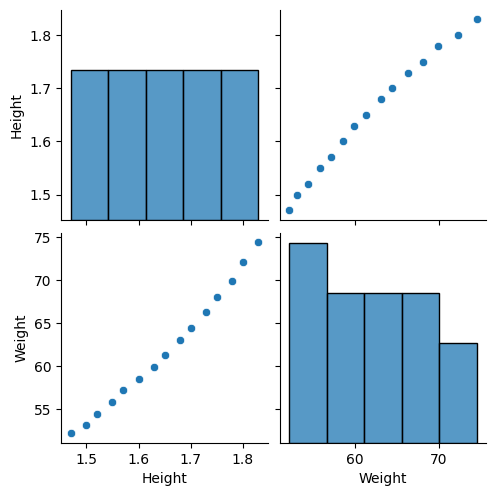

In [70]:
sns.pairplot(df)

In [71]:
x= df[['Weight']]
type(x)

pandas.core.frame.DataFrame

In [72]:
x1=np.array(x)
x.shape

(15, 1)

In [73]:
y=df['Height']

In [74]:
y.shape

(15,)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [76]:
x_train.shape

(11, 1)

In [77]:
#standarization
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)

In [79]:
x_test=scaler.transform(x_test)

In [80]:
x_test

array([[ 0.49985914],
       [ 1.07061624],
       [-1.42782185],
       [ 1.71370068]])

In [81]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()

In [82]:
slr.fit(x_train,y_train)

LinearRegression()

In [83]:
print("Coffiecient",slr.coef_)
print("INtercept is",slr.intercept_)

Coffiecient [0.10138121]
INtercept is 1.6399999999999997


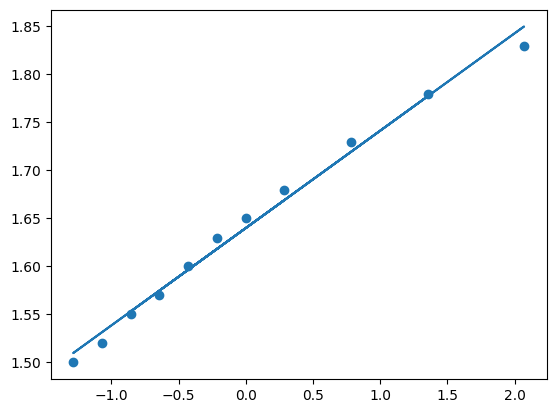

In [84]:
plt.scatter(x_train,y_train)
plt.plot(x_train,slr.predict(x_train))

In [85]:
y_pedict=slr.predict(x_test)

In [86]:
y_pedict

array([1.69067633, 1.74854037, 1.49524569, 1.81373705])

In [87]:
# performance matrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse= mean_squared_error(y_test,y_pedict)
mae= mean_absolute_error(y_test,y_pedict)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.00022877823247598116
0.012441511361401869
0.015125416770323427


In [88]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pedict)
print(score)

0.9856565371488413


In [ ]:
#checking for new data
x_newtest= [[72],[85],[55],[56],[60],[59]]
x_newtest1=scaler.transform(x_newtest)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [95]:
slr.predict(x_newtest1)

array([1.81070835, 2.01793497, 1.53971971, 1.55566022, 1.61942225,
       1.60348174])

In [98]:
adr2= 1 -( (1-score)*(len(y_test)-1)/(len(y_pedict)-2))

In [99]:
print(adr2)

0.9784848057232619


In [103]:
#now creating model with ols method
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [109]:
prediction = model.predict(x_test)

In [110]:
print(prediction)

[ 0.05067633  0.10854037 -0.14475431  0.17373705]
